In [4]:
# LAB 1

import gensim.downloader as api
import numpy as np
model = api.load('glove-wiki-gigaword-100')


king_vector = model['king']
man_vector = model['man']
woman_vector = model['woman']


result_vector = king_vector - man_vector + woman_vector


result = model.most_similar([result_vector], topn=1)
print(f"Result of 'king - man + woman': {result[0][0]}")

queen_vector = model['queen']
cosine_sim = np.dot(result_vector, queen_vector) / (np.linalg.norm(result_vector) * np.linalg.norm(queen_vector))
print(f"Cosine similarity between 'king - man + woman' and 'queen': {cosine_sim:.4f}")


words_to_compare = ['queen', 'king', 'man', 'woman', 'empress']
similarities = {}

for word in words_to_compare:
    word_vector = model[word]
    cosine_sim = np.dot(result_vector, word_vector) / (np.linalg.norm(result_vector) * np.linalg.norm(word_vector))
    similarities[word] = cosine_sim


print("\nCosine similarities with result vector:")
for word, sim in similarities.items():
    print(f"{word}: {sim:.4f}")


[==================================================] 100.0% 128.1/128.1MB downloaded
Result of 'king - man + woman': king
Cosine similarity between 'king - man + woman' and 'queen': 0.7834

Cosine similarities with result vector:
queen: 0.7834
king: 0.8552
man: 0.3934
woman: 0.5575
empress: 0.5451


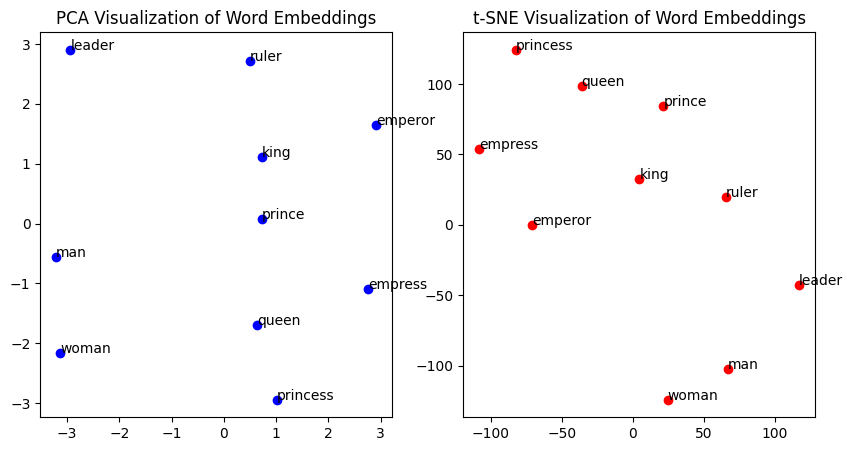

prince: 0.8236
queen: 0.7839
ii: 0.7746
emperor: 0.7736
son: 0.7667


In [8]:
#Lab 2

import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from numpy import dot
from numpy.linalg import norm


model = api.load('glove-wiki-gigaword-50')


words = ['king', 'queen', 'man', 'woman', 'prince', 'princess', 'emperor', 'empress', 'leader', 'ruler']


word_vectors = np.array([model[word] for word in words])


pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)


tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_result = tsne.fit_transform(word_vectors)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], color='blue')
for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]))
plt.title("PCA Visualization of Word Embeddings")

plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], color='red')
for i, word in enumerate(words):
    plt.annotate(word, (tsne_result[i, 0], tsne_result[i, 1]))
plt.title("t-SNE Visualization of Word Embeddings")

plt.show()

input_word = 'king'
similar_words = model.most_similar(input_word, topn = 5)
for w,sim in similar_words:
    print(f"{w}: {sim:.4f}")


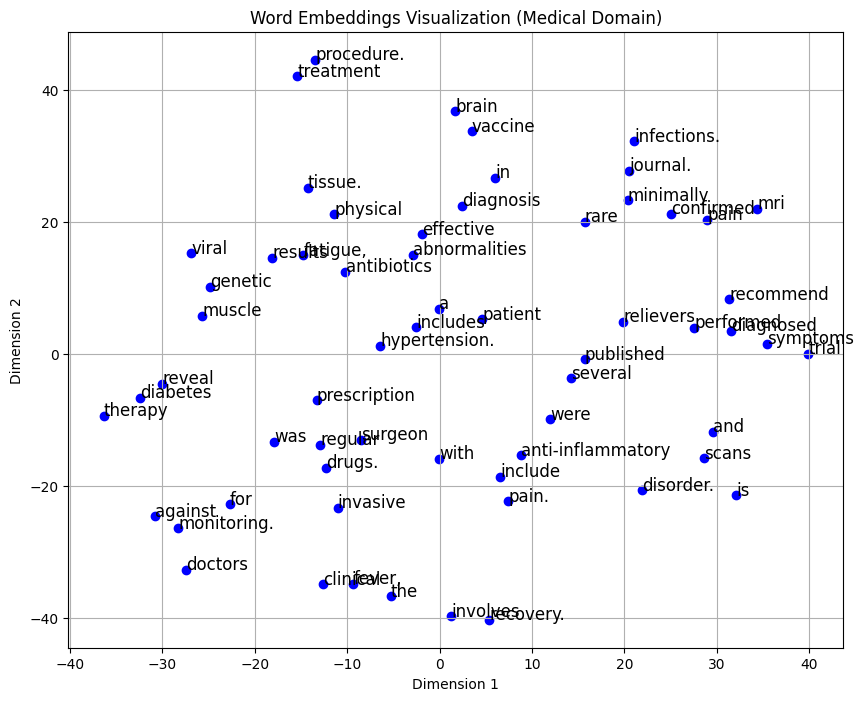

Words similar to 'treatment':
  procedure. (0.27)
  confirmed (0.15)
  muscle (0.13)
  monitoring. (0.12)
  fatigue, (0.12)
Words similar to 'vaccine':
  brain (0.26)
  recommend (0.21)
  procedure. (0.19)
  therapy (0.19)
  in (0.18)


In [9]:
# LAB 3

# pip install gensim matplotlib scikit-learn

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
from gensim.models import Word2Vec


medical_corpus = [
    "The patient was diagnosed with diabetes and hypertension.",
    "MRI scans reveal abnormalities in the brain tissue.",
    "The treatment involves antibiotics and regular monitoring.",
    "Symptoms include fever, fatigue, and muscle pain.",
    "The vaccine is effective against several viral infections.",
    "Doctors recommend physical therapy for recovery.",
    "The clinical trial results were published in the journal.",
    "The surgeon performed a minimally invasive procedure.",
    "The prescription includes pain relievers and anti-inflammatory drugs.",
    "The diagnosis confirmed a rare genetic disorder."
]

processed_corpus = [sentence.lower().split() for sentence in medical_corpus]


model = Word2Vec(sentences=processed_corpus, vector_size=100, window=5, min_count=1, workers=4, epochs=50)


words = list(model.wv.index_to_key)  
embeddings = np.array([model.wv[word] for word in words]) 


tsne = TSNE(n_components=2, random_state=42, perplexity=5)
tsne_result = tsne.fit_transform(embeddings)


plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], color="blue")


for i, word in enumerate(words):
    plt.text(tsne_result[i, 0] + 0.02, tsne_result[i, 1] + 0.02, word, fontsize=12)

plt.title("Word Embeddings Visualization (Medical Domain)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)

plt.show()


def find_similar_words(input_word, top_n=5):
    try:
        similar_words = model.wv.most_similar(input_word, topn=top_n)
        print(f"Words similar to '{input_word}':")
        for word, similarity in similar_words:
            print(f"  {word} ({similarity:.2f})")
    except KeyError:
        print(f"'{input_word}' not found in vocabulary.")


find_similar_words("treatment")
find_similar_words("vaccine")

In [15]:
#LAB 4

from gensim.models import KeyedVectors
from transformers import pipeline
import gensim.downloader as api

word_vectors = api.load("glove-wiki-gigaword-50")  

prompt = "Describe a sunset"


def enrich_prompt(prompt, topn=2):
    words = prompt.lower().split()
    enriched = []
    for word in words:
        if word in word_vectors:
            similar = word_vectors.most_similar(word, topn=topn)
            similar_words = [w for w, _ in similar]
            enriched.extend(similar_words)
    return prompt + " " + " ".join(enriched)

enriched_prompt = enrich_prompt(prompt)


generator = pipeline("text-generation", model="gpt2")

print("Original Prompt:")
print(prompt)
print(generator(prompt, max_length=50, truncation = True)[0]['generated_text'])

print("\nEnriched Prompt:")
print(enriched_prompt)
print(generator(enriched_prompt, max_length=50, num_return_sequences=1, truncation = True)[0]['generated_text'])

Device set to use cpu
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Original Prompt:
Describe a sunset


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Describe a sunset.

1. That evening: The night will go better when the sun has been set, that is, it will be dark; and when the night shall be changed. 2. A sunset shall bring the sun to a

Enriched Prompt:
Describe a sunset explain suggest another an sunrise midnight
Describe a sunset explain suggest another an sunrise midnight the same as a sunset, if there is ever any such time or place.The term can be used, for example, to distinguish between sunset and sunrise.

To make use of this information


In [12]:
#LAB 5

import gensim.downloader as api
import random

# Load pre-trained GloVe word vectors
model = api.load("glove-wiki-gigaword-50")

def generate_story(seed_word, topn=5):
    if seed_word not in model:
        return "Seed word not in vocabulary."

    similar_words = [word for word, _ in model.most_similar(seed_word, topn=topn)]

    
    story = f"Once upon a time, a {seed_word} dreamed of becoming {similar_words[0]} and {similar_words[1]}. "
    story += f"Every day, it practiced {similar_words[2]} near the old {similar_words[3]}. "
    story += f"One day, it discovered a secret about {similar_words[4]} that changed everything."

    return story


seed = input("Enter a seed word: ").strip().lower()
print("\nGenerated Story:\n")
print(generate_story(seed))



Generated Story:

Once upon a time, a sports dreamed of becoming sport and soccer. Every day, it practiced basketball near the old professional. One day, it discovered a secret about sporting that changed everything.


In [ ]:
#LAB 6

from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")

input_sentences = [
    "This service is terrible",
    "I absolutely hated it",
    "Wow this is lovely",
    "I love the view"
]

results = sentiment_pipeline(input_sentences)

for sen, res in zip(input_sentences, results):
    print(f"Sentence: {sen} - Label: {res['label']} - Score: {res['score']}")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


Sentence: This service is terrible - Label: NEGATIVE - Score: 0.9995855689048767
Sentence: I absolutely hated it - Label: NEGATIVE - Score: 0.9994800686836243
Sentence: Wow this is lovely - Label: POSITIVE - Score: 0.9998654127120972
Sentence: I love the view - Label: POSITIVE - Score: 0.9998795986175537


In [ ]:
#LAB 7

from transformers import pipeline


summarizer = pipeline("summarization", model="t5-small")


text = input("Enter a long passage:\n")


summary1 = summarizer(text, max_length=40, min_length=10, do_sample=False)
summary2 = summarizer(text, max_length=40, min_length=10, do_sample=True, temperature = 0.9, top_k = 50)

print("\nSummary:\n")
print(summary1[0]['summary_text'])
print(summary2[0]['summary_text'])